#Assignment 3
### Question 9 and Question 10

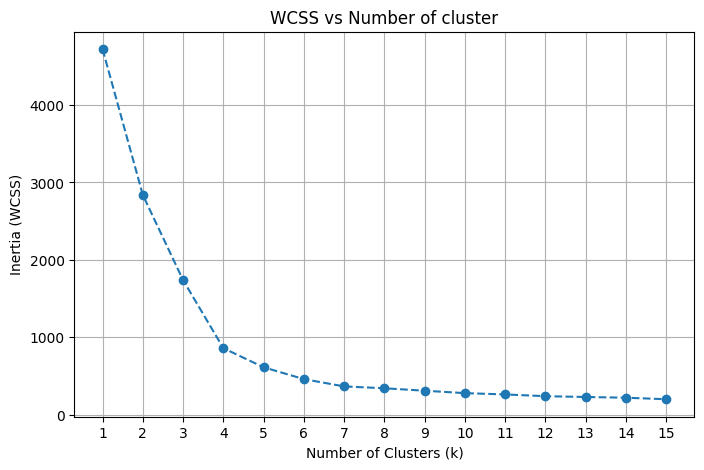

In [16]:
# Question 9
# part a)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/A3_P1.csv')

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

wcss = []
k_values = range(1, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('WCSS vs Number of cluster')
plt.xticks(k_values)
plt.grid()
plt.show()



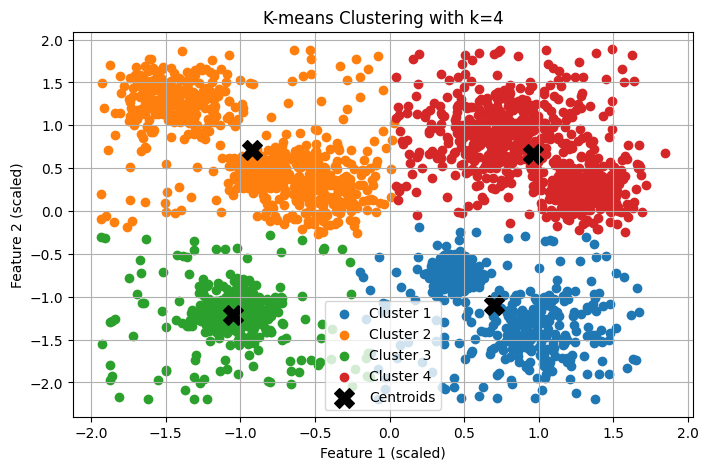

In [18]:
# Question 9
## part b)

optimal_k = 4

# part c)
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(data_scaled)
labels = kmeans_optimal.labels_
centroids = kmeans_optimal.cluster_centers_

plt.figure(figsize=(8, 5))
for i in range(optimal_k):
    plt.scatter(data_scaled[labels == i, 0], data_scaled[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title(f'K-means Clustering with k={optimal_k}')
plt.legend()
plt.grid()
plt.show()

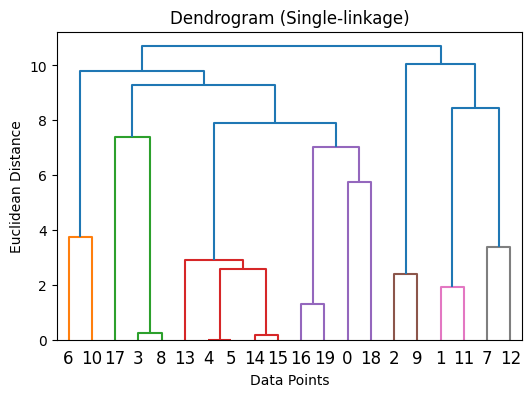

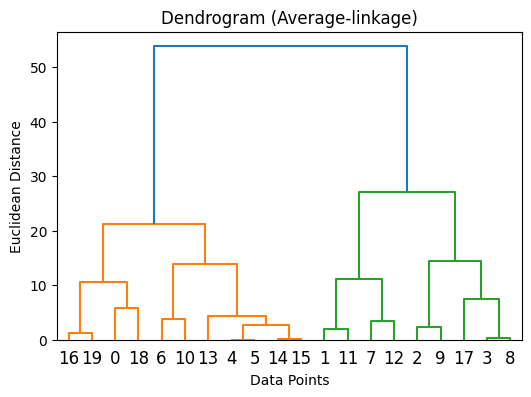

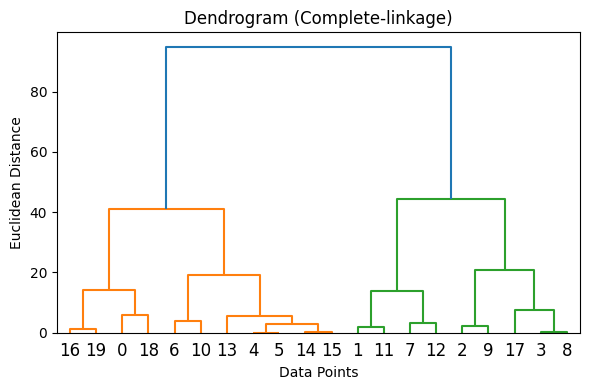

In [22]:
## Question 10
from scipy.cluster.hierarchy import dendrogram, linkage
data = pd.read_csv('/A3_P2.csv')

X = data['Feature_1'].values.reshape(-1, 1)

methods = ['single', 'average', 'complete']

for i, method in enumerate(methods):

    Z = linkage(X, method=method, metric='euclidean')

    plt.figure(figsize=(6, 4))
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()}-linkage)')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean Distance')

plt.tight_layout()
plt.show()
